In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os 
import glob 
import pathlib
import process_data_saxs as pds
import plot_saxs_curves as ps
import save_saxs_data as ssd

In [2]:
path = r'C:\Users\Dimitris\Desktop\Metr26-SAXS-Corrections\Metr26.1\Νέος φάκελος'
path= pathlib.PureWindowsPath(path).as_posix()+'/'
print(path)

C:/Users/Dimitris/Desktop/Metr26-SAXS-Corrections/Metr26.1/Νέος φάκελος/


CHECK THE SAMPLES POSITION AND INDEX FOR BACKGROUND SUBSTRACTION
0 00_emptybeam_147cm_14400s_unwarped_exported.dat_counts
1 01_empty_147cm_14400s_unwarped_exported.dat_counts
2 02_FBS_147cm_14400s_unwarped_exported.dat_counts
3 A1H1_FBS_0_25_147cm_14400s_unwarped_exported.dat_counts
4 A1H1_FBS_0_5_147cm_14400s_unwarped_exported.dat_counts


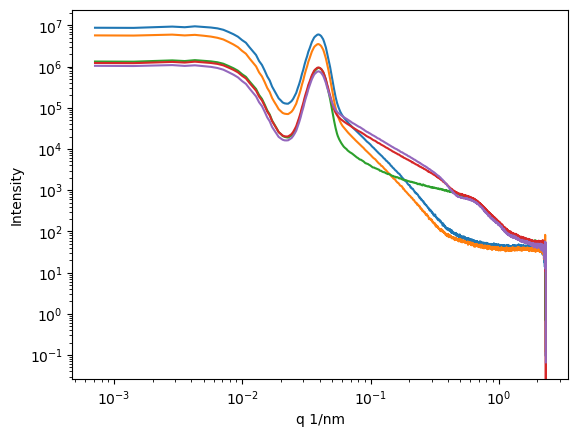

In [3]:
qdata,idata,err_data, B, sample_name = pds.import_scattering_data(path,plot = True)

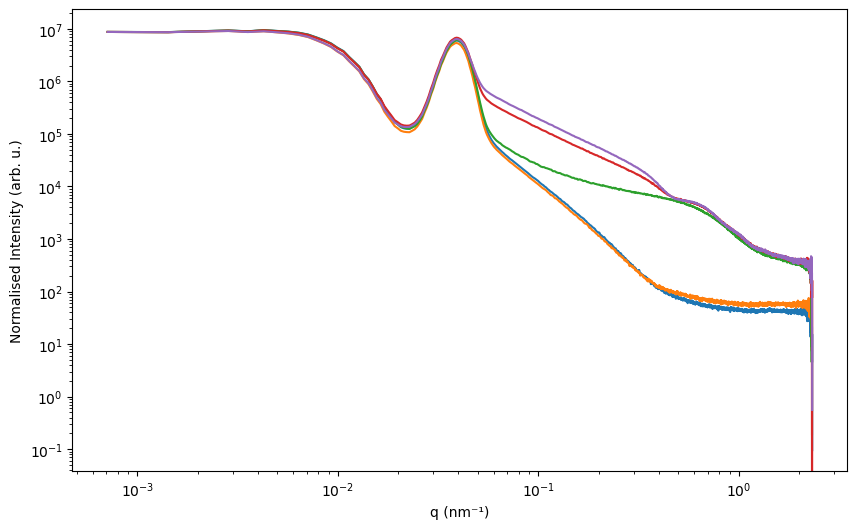

In [4]:
idata_corrected, transmission_data, err_corrected = pds.transmission_correction(idata, err_data)
ps.plot_scattering_curves(qdata, idata_corrected, ylabel = 'Normalised Intensity (arb. u.)')

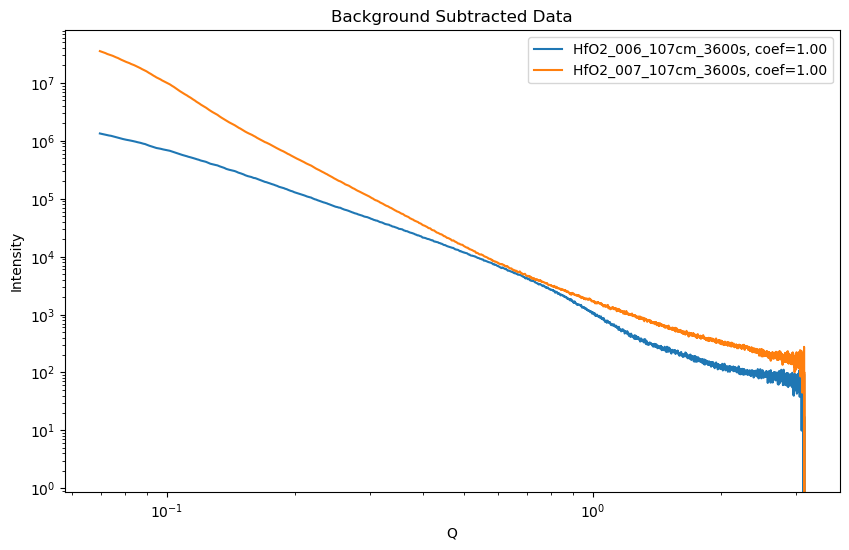

In [6]:
Qdata, Idata,Err, sname,bck_coef,avg =  pds.background_subtraction(idata_corrected,err_corrected,qdata,sample_name,averaging=False, air = 0, capillary = 1 ,water = 2, bck_coef = [1], q_lim = 147)


In [7]:
if (avg):
    ssd.save_1D_average_data(path,sname,Qdata,Idata,Err)
else:
    ssd.save_1D_data(path, sname, Qdata, Idata, Err)

1D data have been saved at: C:/Users/sapd/Desktop/Metr25-SAXS-SiO2_Coated-HfO,13.06.2024/Metr25-Corrections/Metr25.2/1D
